In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import norm

In [21]:
data = pd.read_csv("Housing.csv")
df = pd.DataFrame(data)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [22]:
df_2 = pd.get_dummies(df, drop_first=True)
df_2.corr()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.187057,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,0.093073,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194


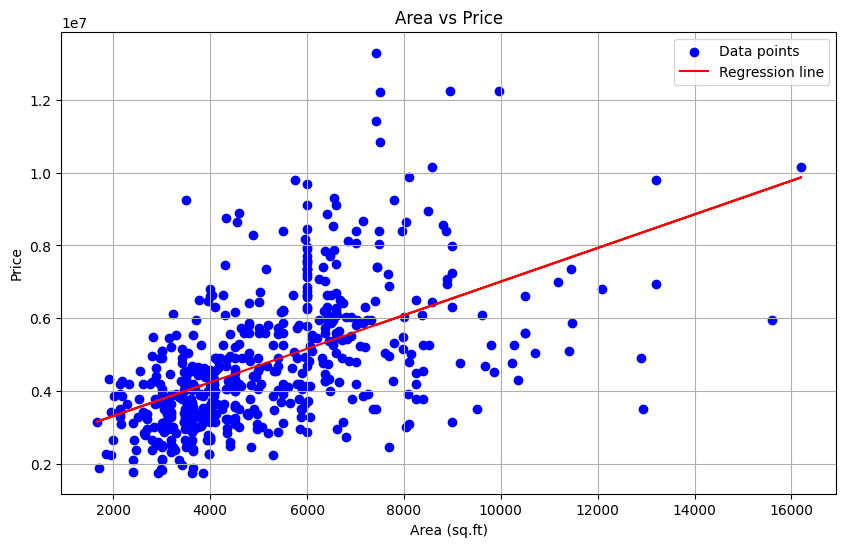

0.2872931546811468

In [31]:
X_area = df_2[['area']]
y_price = df_2['price']

model_area = LinearRegression()
model_area.fit(X_area, y_price)
y_pred = model_area.predict(X_area)

r_squared_area = r2_score(y_price, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X_area, y_price, color='blue', label='Data points')
plt.plot(X_area, y_pred, color='red', label='Regression line')
plt.title("Area vs Price")
plt.xlabel("Area (sq.ft)")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

r_squared_area

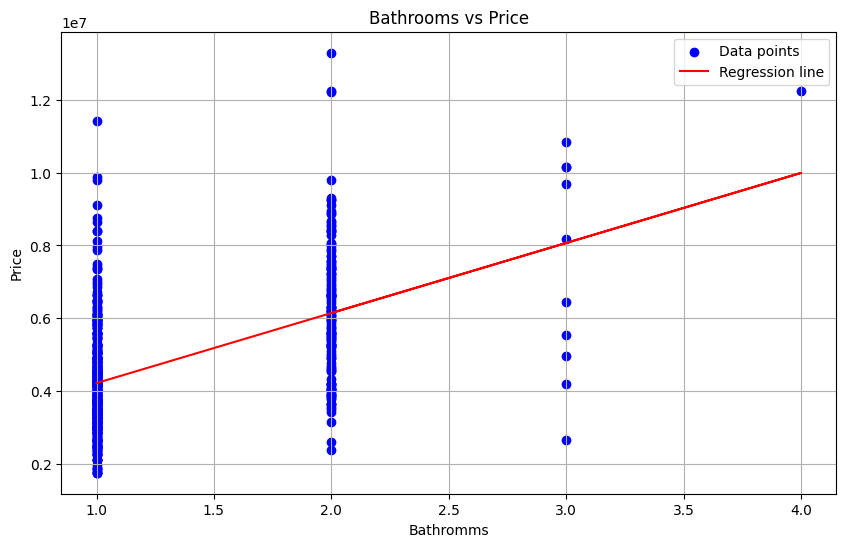

0.26785317839160294

In [32]:
X_bathrooms = df_2[['bathrooms']]
y_price = df_2['price']

model = LinearRegression()
model.fit(X_bathrooms, y_price)
y_pred = model.predict(X_bathrooms)

r_squared = r2_score(y_price, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X_bathrooms, y_price, color='blue', label='Data points')
plt.plot(X_bathrooms, y_pred, color='red', label='Regression line')
plt.title("Bathrooms vs Price")
plt.xlabel("Bathromms")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

r_squared

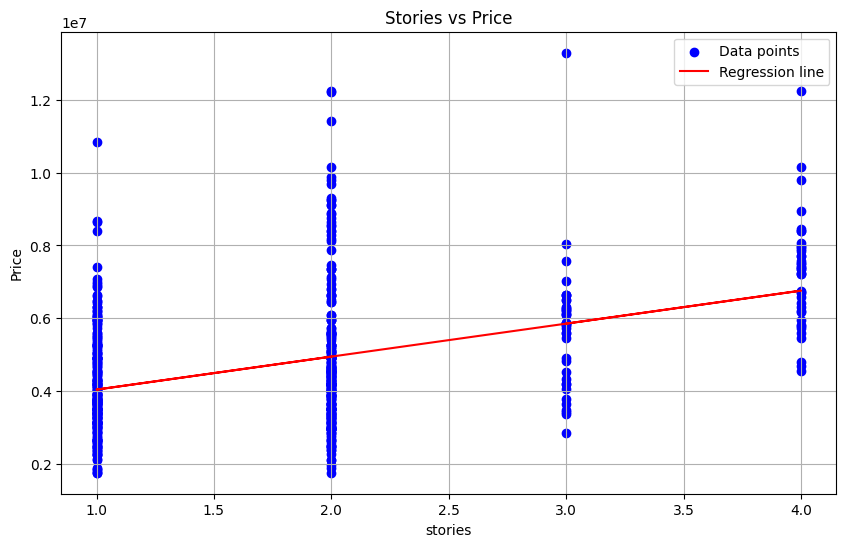

0.17699889506402489

In [48]:
X = df_2[['stories']]
y_price = df_2['price']

model = LinearRegression()
model.fit(X, y_price)
y_pred = model.predict(X)

r_squared = r2_score(y_price, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X, y_price, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title("Stories vs Price")
plt.xlabel('stories')
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

r_squared

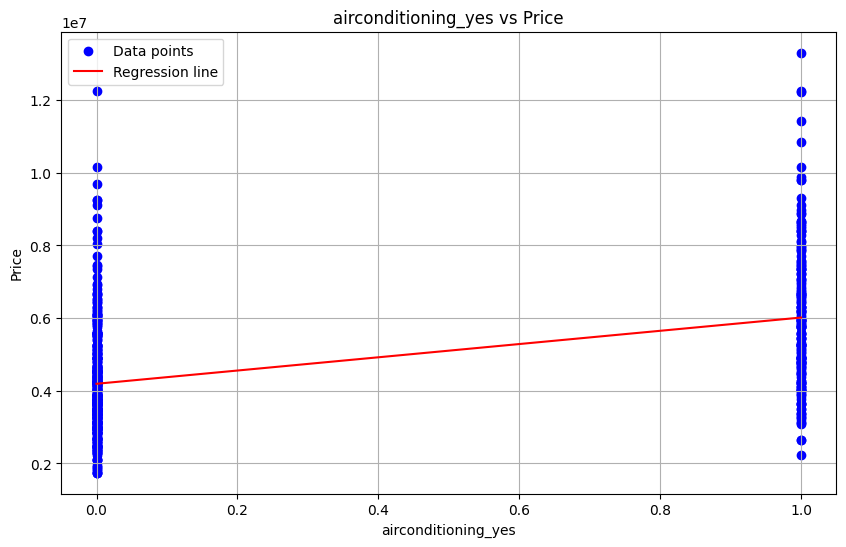

0.20516740244423548

In [49]:
X = df_2[['airconditioning_yes']]
y_price = df_2['price']

model = LinearRegression()
model.fit(X, y_price)
y_pred = model.predict(X)

r_squared = r2_score(y_price, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X, y_price, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title("airconditioning_yes vs Price")
plt.xlabel('airconditioning_yes')
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

r_squared

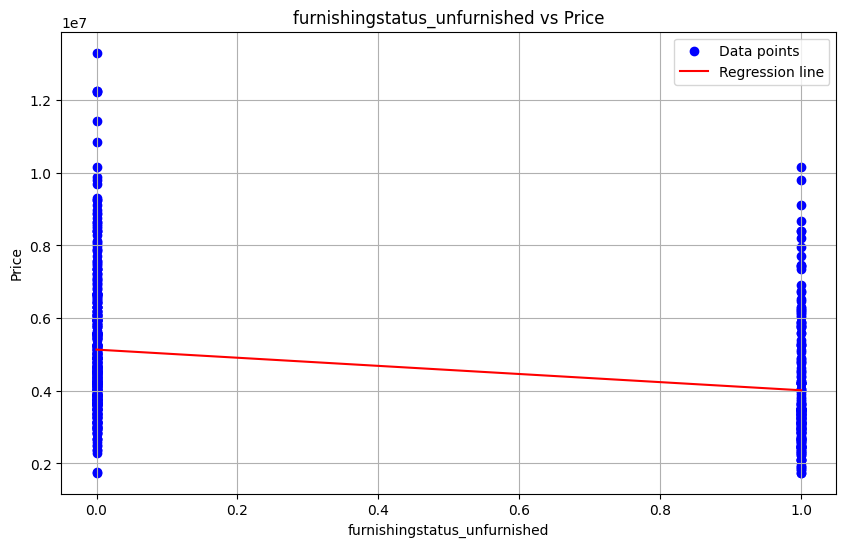

0.078729265090695

In [50]:
X = df_2[['furnishingstatus_unfurnished']]
y_price = df_2['price']

model = LinearRegression()
model.fit(X, y_price)
y_pred = model.predict(X)

r_squared = r2_score(y_price, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X, y_price, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title("furnishingstatus_unfurnished vs Price")
plt.xlabel('furnishingstatus_unfurnished')
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

r_squared

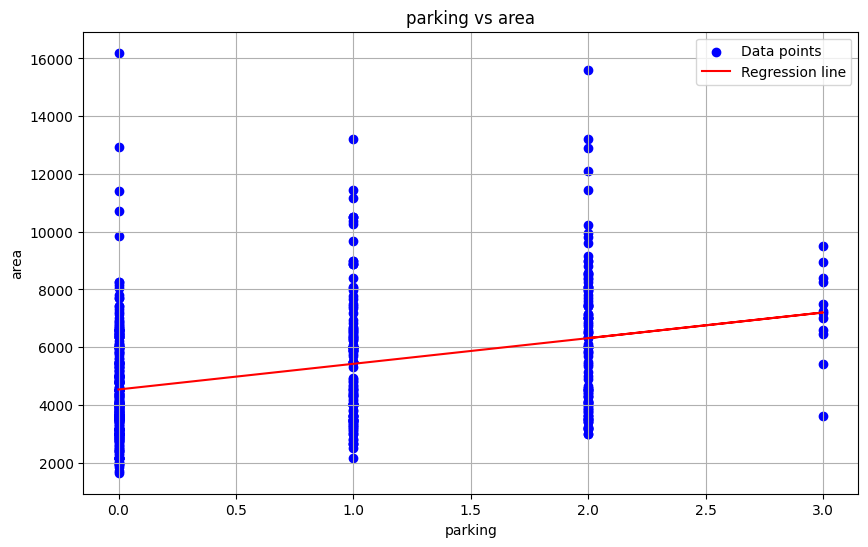

0.1245952201164311

In [53]:
X = df_2[['parking']]
y_area = df_2['area']

model = LinearRegression()
model.fit(X, y_area)
y_pred = model.predict(X)

r_squared = r2_score(y_area, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X, y_area, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title("parking vs area")
plt.xlabel('parking')
plt.ylabel("area")
plt.legend()
plt.grid(True)
plt.show()

r_squared

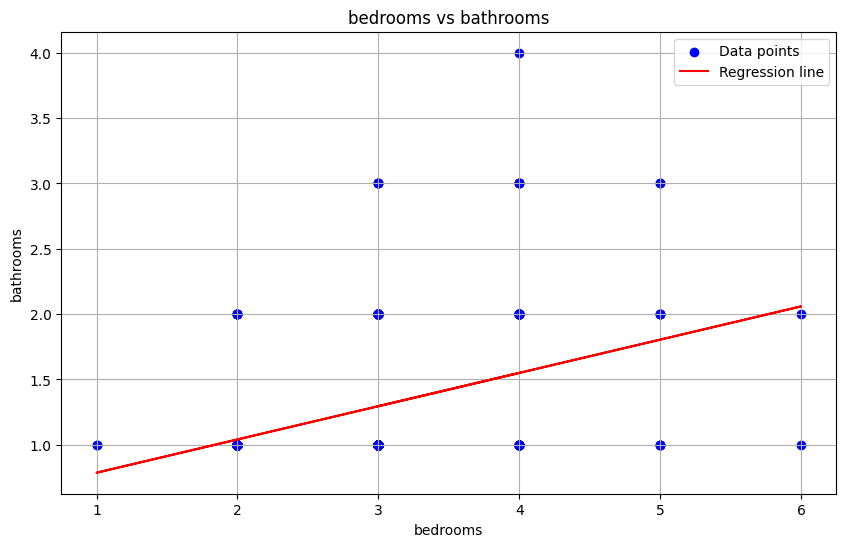

0.13982382137419036

In [54]:
X = df_2[['bedrooms']]
y_bathrooms = df_2['bathrooms']

model = LinearRegression()
model.fit(X, y_bathrooms)
y_pred = model.predict(X)

r_squared = r2_score(y_bathrooms, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X, y_bathrooms, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title("bedrooms vs bathrooms")
plt.xlabel('bedrooms')
plt.ylabel("bathrooms")
plt.legend()
plt.grid(True)
plt.show()

r_squared

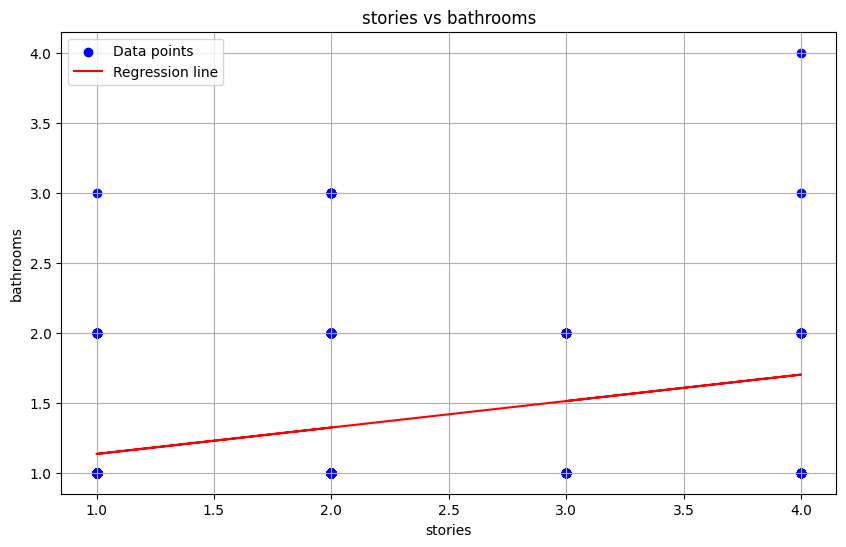

0.10638341552678832

In [55]:
X = df_2[['stories']]
y_bathrooms = df_2['bathrooms']

model = LinearRegression()
model.fit(X, y_bathrooms)
y_pred = model.predict(X)

r_squared = r2_score(y_bathrooms, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X, y_bathrooms, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title("stories vs bathrooms")
plt.xlabel('stories')
plt.ylabel("bathrooms")
plt.legend()
plt.grid(True)
plt.show()

r_squared

Проанализируем ключевые корреляции:
1. price
    1) area r = 0.536 Умеренная положительная связь. Увеличение площади дома связано с увеличением цены. 
    2) bathrooms r = 0.518 Умеренная положительная связь. Большее количество ванных комнат связано с увеличением цены.
    3) stories r = 0.421 Умеренная положительная связь. Большее количество этажей связано с увеличением цены.
    4) airconditioning_yes r = 0.453 Умеренная положительная связь. Наличие кондиционера увеличивает стоимость жилья.
    5) furnishingstatus_unfurnished r = -0.281 Слабая отрицательная связь. Меблированность дома положительно влияет на цену.
2. area
    1) parking r = 0.353 Умеренная положительная связь. Большая площадь связана с большей вероятностью наличия парковки.
3. bathrooms
    1) bedrooms r = 0.374 Умеренная положительная связь. Большее количество спален связано с увеличением числа ванных комнат.
    2) stories r = 0.326 Умеренная положительная связь. Большее количество этажей связано с увеличением числа ванных комнат.


Площадь, количество ванных комнат, количество этажей и наличие кондиционера оказывают наибольшее влияние на цену, также furnishingstatus_unfurnished оказывают противоположное влияние. (меньшее количество мебели снижает цену)

In [34]:
data = pd.read_csv("student_attendance.csv")
df = pd.DataFrame(data)
df

,Weather,Temperature,Attendance
0,Sunny,5.780964,Present
1,Snowy,10.639905,Absent
2,Rainy,18.034428,Present
3,Sunny,14.250122,Present
4,Snowy,27.504825,Absent
...,...,...,...
9995,Cloudy,21.344979,Present
9996,Rainy,6.315741,Present
9997,Cloudy,20.471348,Absent
9998,Snowy,20.774593,Absent


Случайная выборка (~1/3 наблюдений)

In [39]:
random_sample = df.sample(frac=1/3, random_state=42)
random_sample

,Weather,Temperature,Attendance
6252,Sunny,7.641229,Present
4684,Sunny,24.594193,Present
1731,Snowy,-1.828674,Absent
4742,Sunny,12.549902,Present
4521,Sunny,9.884697,Present
...,...,...,...
2641,Snowy,23.836542,Present
7639,Snowy,11.586984,Absent
7360,Cloudy,26.908099,Present
8182,Rainy,23.667381,Absent


Стратифицированная выборка (~1/3 наблюдений из каждой группы 'Weather')

In [38]:
stratified_sample = df.groupby('Weather', group_keys=False).apply(
    lambda x: x.sample(frac=1/3, random_state=42)
)
stratified_sample

,Weather,Temperature,Attendance
8967,Cloudy,14.579506,Present
8919,Cloudy,18.320127,Absent
5589,Cloudy,14.028253,Absent
6210,Cloudy,21.942252,Absent
4579,Cloudy,11.911097,Present
...,...,...,...
7663,Sunny,28.213314,Present
2084,Sunny,12.530053,Present
4094,Sunny,21.828027,Present
4203,Sunny,21.982048,Present


Средние значения

In [40]:
general_mean = df['Temperature'].mean()
random_mean = random_sample['Temperature'].mean()
stratified_mean = stratified_sample['Temperature'].mean()
print(general_mean)
print(random_mean)
print(stratified_mean)

19.886668539170437
19.944585563824962
19.614199335567367


Доверительные интервалы

In [45]:
confidence_levels = [0.90, 0.95, 0.99]
sample_stats = {}

for sample_name, sample in zip(['Случайная выборка', 'Стратифицированная выборка'], [random_sample, stratified_sample]):
    sample_mean = sample['Temperature'].mean()
    sample_std = sample['Temperature'].std(ddof=1)
    sample_size = len(sample)
    intervals = {}
    
    for confidence in confidence_levels:
        error = norm.ppf(1 - (1 - confidence) / 2) * (sample_std / (sample_size**0.5))
        intervals[confidence] = (sample_mean - error, sample_mean + error)
    
    sample_stats[sample_name] = {'Среднее': sample_mean, 'Доверительные интервалы': intervals}
general_mean, sample_stats

(19.886668539170437,
 {'Случайная выборка': {'Среднее': 19.944585563824962,
   'Доверительные интервалы': {0.9: (19.662731371633566, 20.226439756016358),
    0.95: (19.60873557903901, 20.280435548610914),
    0.99: (19.503203865369358, 20.385967262280566)}},
  'Стратифицированная выборка': {'Среднее': 19.614199335567367,
   'Доверительные интервалы': {0.9: (19.329987535272934, 19.8984111358618),
    0.95: (19.275540087454946, 19.952858583679788),
    0.99: (19.169125639271606, 20.05927303186313)}}})